In [1]:
import sys
sys.path.append("/home/marin/projects/mhac/build")
import mhac

In [2]:
%matplotlib inline
import random, copy, math
import matplotlib.pyplot as plt
import numpy as np

In [3]:
def read_TSP_data(filepath="../data/tsp/eil101.tsp"):
    cities = mhac.physics.examples.Cities()

    with open(filepath, 'r') as infile:
        Name = infile.readline().strip().split()[1] # NAME
        FileType = infile.readline().strip().split()[1] # TYPE
        Comment = infile.readline().strip().split()[1] # COMMENT
        Dimension = infile.readline().strip().split(":")[1] # DIMENSION
        EdgeWeightType = infile.readline().strip().split()[1] # EDGE_WEIGHT_TYPE
        infile.readline()

        for i in range(int(Dimension)):
            coords = infile.readline().strip().split()[1:]
            city = mhac.physics.examples.City(int(coords[0]), int(coords[1]))
            cities.append(city)

    return cities

In [4]:
def displayTour(cities, solution):
    plt.figure(figsize = (16,8))
    N = len(cities)

    plt.axes()
    plt.plot([cities[solution[i % N]].x for i in range(N+1)], [cities[solution[i % N]].y for i in range(N+1)], 'bo-')
    plt.show()

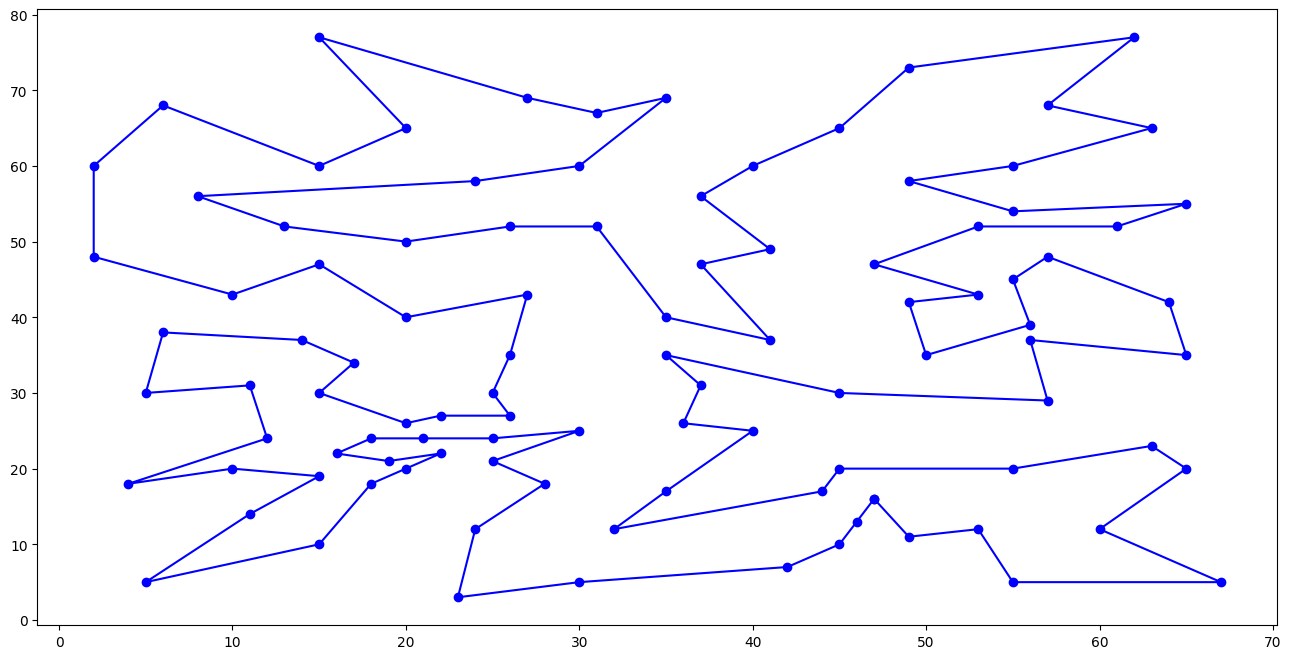

In [5]:
problem = mhac.physics.examples.TSP(read_TSP_data())
SA = mhac.physics.SimulatedAnnealing(problem)
SA.solve(1000., 0.000001)
displayTour(problem.mCities, SA.getSolution().tour)

In [16]:
class PythonSol(mhac.physics.Solution):
    def __init__(self):
        mhac.physics.Solution.__init__(self)
        self.tour = []

class PythonTSP(mhac.physics.Problem):
    def __init__(self, cities):
        mhac.physics.Problem.__init__(self)
        self.cities = cities

    def generateInitialSolution(self):
        sol = PythonSol()
        sol.tour = random.sample(range(len(self.cities)), len(self.cities))
        return sol

    def generateNewSolution(self, intialSolution: PythonSol):
        i, j = random.sample(range(self.N),2)
        if i > j: i,j=j,i
        newSol = PythonSol()
        newSol.tour = intialSolution.tour
        for k in range((j-i)//2):
            newSol.tour[i+k], newSol.tour[j-k] = newSol.tour[j-k], newSol.tour[i+k]
        return newSol

    def evaluateSolution(self, solution):
        val = 0
        citiesSize = len(self.cities)
        for i in range(citiesSize-1):
            val += self.cities[solution.tour[i]].distance(self.cities[solution.tour[i+1]])
        val += self.cities[solution.tour[0]].distance(self.cities[solution.tour[citiesSize-1]])
        return val

Because SA::solve internally uses base class Solution, PythonTSP::evaluateSolution is also going to be called with the base class

This deserves further investigation but not quite worth it...

In [18]:
problem = PythonTSP(read_TSP_data())
SA = mhac.physics.SimulatedAnnealing(problem)
SA.solve(1000., 0.000001)
displayTour(problem.mCities, SA.getSolution().tour)

AttributeError: 'mhac.physics.Solution' object has no attribute 'tour'